In [21]:
    import matplotlib.pyplot as plt
    import plotly.plotly as py
    import csv
    import pandas as pd
    import numpy as np

    bubbles_mpl = plt.figure()
    rdf = pd.read_csv('ride_data.csv', delimiter=',', encoding="utf-8-sig")
    cdf = pd.read_csv('city_data.csv', delimiter=',', encoding="utf-8-sig")

    #rdf.head()
    #cdf.head() 


In [32]:
print ("==================================")
print ("   Analysis of Pyber Dataset","\n", "==================================")
#City and rides data merged
crdf = pd.merge(rdf,cdf,on="city", how="left")
crdf.head()

   Analysis of Pyber Dataset 


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [33]:
## Analysis of rides data per city

In [26]:
#    Average Fare ($) Per City
#    Total Number of Rides Per City
#    Total Number of Drivers Per City
#    City Type (Urban, Suburban, Rural)
analysis_df = crdf.groupby('city').agg({'fare': 'mean', 'ride_id':'nunique', 'driver_count': 'first', 'type':'first'}).sort_values('driver_count', ascending = False) 
analysis_df.columns = [ 'AvgFare/City', 'TotalRides/City','TotalDrivers/City','City_type']
analysis_df.head()


,AvgFare/City,TotalRides/City,TotalDrivers/City,City_type
city,,,,
Davidtown,22.978095,21,73,Urban
South Bryanstad,24.598571,21,73,Urban
Williamshire,26.990323,31,70,Urban
West Sydneyhaven,22.368333,18,70,Urban
Torresshire,24.207308,26,70,Urban


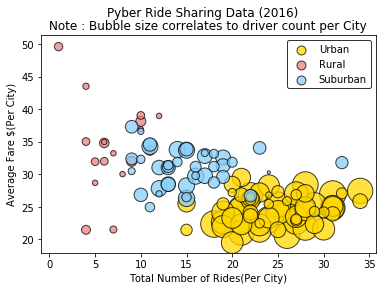

In [18]:
#Separate data frames for City_type
urban = analysis_df[analysis_df['City_type'] == 'Urban']
rural = analysis_df[analysis_df['City_type'] == 'Rural']
suburban = analysis_df[analysis_df['City_type'] == 'Suburban']

#Color Dictionary 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data (2016)')

# Scatter plots per each city type
plt.scatter(urban['TotalRides/City'], urban['AvgFare/City'], s = urban['TotalDrivers/City']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(rural['TotalRides/City'], rural['AvgFare/City'], s = rural['TotalDrivers/City']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['TotalRides/City'], suburban['AvgFare/City'], s = suburban['TotalDrivers/City']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)

# Printing scatter plots
plt.title('Note : Bubble size correlates to driver count per City')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare $(Per City)')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]

plt.show()